In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_results = pd.read_pickle('df_results.pkl')
df_results.head()

,training_mode,num_parameters,filters,batch_size,duration,accs,epochs_time,cuda_dt_time,model
0,parallel_cpu,54410,32,100,41.853899,"[0.09, 0.15, 0.14, 0.09, 0.31, 0.33, 0.28, 0.2...","[0.3829994201660156, 0.394000768661499, 0.3781...",NaN,([[[[ 0.06552573 0.13781809 -0.20620239 0.12...
1,sequential,54410,32,100,32.250347,"[0.12, 0.12, 0.22, 0.22, 0.2, 0.2, 0.29, 0.29,...","[0.3150005340576172, 0.3189997673034668, 0.322...",NaN,([[[[ 0.12492262 -0.30412308 0.0706252 0.03...
2,parallel_cuda,54410,32,100,30.677562,"[0.05, 0.07, 0.18, 0.23, 0.24, 0.38, 0.42, 0.4...","[2.399482011795044, 0.2940394878387451, 0.2849...","[0.1679995059967041, 0.0530397891998291, 0.054...",([[[[-0.04059594 0.09775106 -0.03440225 0.08...
3,parallel_cpu,54410,32,250,56.516011,"[0.092, 0.188, 0.208, 0.256, 0.34, 0.448, 0.41...","[0.4819986820220947, 0.4799997806549072, 0.506...",NaN,([[[[ 0.07212851 -0.04164744 -0.06850746 0.13...
4,sequential,54410,32,250,62.457249,"[0.124, 0.124, 0.164, 0.164, 0.156, 0.156, 0.2...","[0.6821901798248291, 0.6609997749328613, 0.654...",NaN,([[[[-0.22775004 0.06105595 0.23759619 -0.19...


Fix batch_size

Text(0.5, 1.0, 'Results for batch_size = 1000')

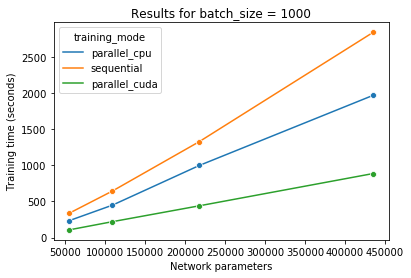

In [3]:
df_plot = df_results[df_results['batch_size'] == 1000]
sns.lineplot(x='num_parameters',y='duration', hue='training_mode', marker='o',data = df_plot)
plt.xlabel('Network parameters')
plt.ylabel('Training time (seconds)')
plt.title('Results for batch_size = 1000')

Fix number of filters

Text(0.5, 1.0, 'Results for filters = 256')

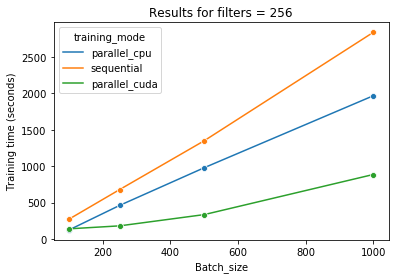

In [4]:
df_plot = df_results[df_results['filters'] == 256]
sns.lineplot(x='batch_size',y='duration', hue='training_mode', marker='o',data = df_plot)
plt.xlabel('Batch_size')
plt.ylabel('Training time (seconds)')
plt.title('Results for filters = 256')

Epoch training time boxplot

Text(0.5, 1.0, 'Epoch training time (batch_size = 1000 & filters = 256)')

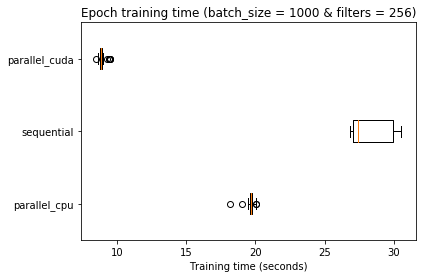

In [5]:
df_plot = df_results[(df_results['filters'] == 256)&(df_results['batch_size'] == 1000)]
plt.figure()
plt.hold = True
plt.boxplot(df_plot.epochs_time,vert=0, labels=df_plot.training_mode)
plt.xlabel('Training time (seconds)')
plt.title('Epoch training time (batch_size = 1000 & filters = 256)')

Epoch training time, in GPU, data transfer 

Text(0.5, 1.0, 'Epoch training time (batch_size = 1000 & filters = 256)')

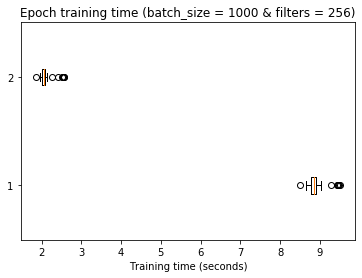

In [6]:
df_plot = df_results[(df_results['filters'] == 256)&(df_results['batch_size'] == 1000) & (df_results['training_mode'] == 'parallel_cuda')]
epochs_time = df_plot.epochs_time.values[0]
data_transfer_time = df_plot.cuda_dt_time.values[0]
a = []
a.append(epochs_time)
a.append(data_transfer_time)

plt.figure()
plt.hold = True
plt.boxplot(a,vert=0)
plt.xlabel('Training time (seconds)')
plt.title('Epoch training time (batch_size = 1000 & filters = 256)')

Plot accuracy on training set, of the model trained with 256 filters and batch size of 1000

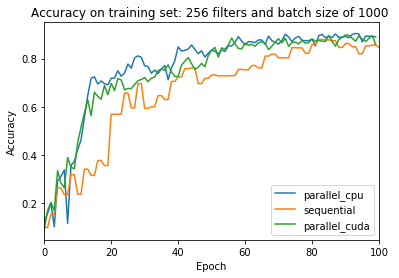

In [7]:
df_plot = df_results[(df_results['filters'] == 256)&(df_results['batch_size'] == 1000)]
import matplotlib.pyplot as plt
for i, r in df_plot.iterrows():
    plt.plot( list(range(0,len(r.accs))),r.accs, label=r.training_mode)
    plt.title('Accuracy on training set: 256 filters and batch size of 1000 ')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.xlim(0,100)
plt.legend()